# Case Study on Unsupervvised Learning

**Try out different clustering models in the wine dataset.
 and finding the optimum number of clusters in each model and create the model with
the optimum number of clusters.**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the wine data into the python environment
df = pd.read_csv('Wine.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.shape

(178, 13)

In [6]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
df.describe()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Analysis: After performing some exploitary data analysis no null values are present in the data set and all features are numerical datatypes. So no need of performing the pre processing operations.

In [ ]:
#correlation between features

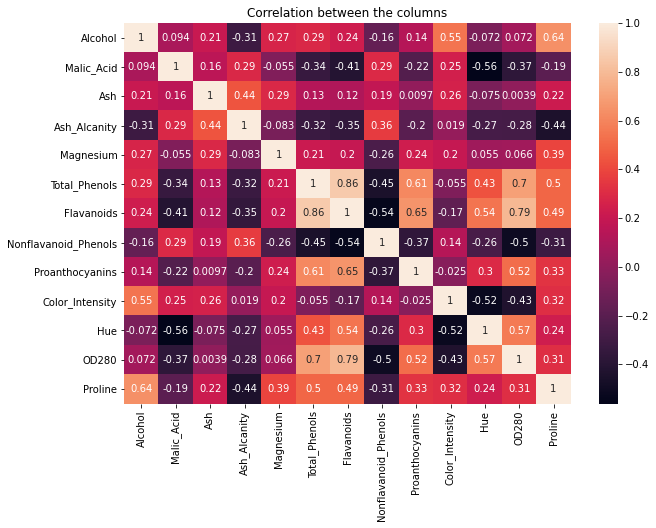

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

Analysis: More features are less correlated and very few are having strong correlation.

**KMeans Clustering**

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


17592296.383508474
4543749.614531863
2370689.6867829696
1337029.4929415903
916379.1871539167
647326.0020260852
412303.82825080125
323223.2470542671
270954.9292415374
217887.3785603329


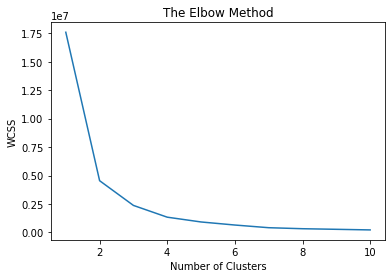

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS")
plt.show()

In [16]:
#The optimum number of clusters is equal to 3. 

In [17]:
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(df)
labels=model_kmeans.predict(df)
print(labels)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


In [18]:
# wine data is clustered in 3 classes.

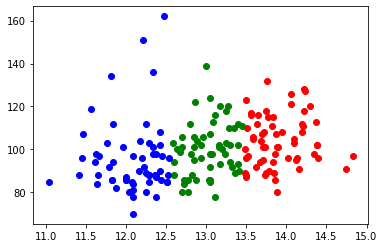

In [24]:
#visualization
kmeans1 = KMeans(n_clusters=3, random_state=0)
clusters = kmeans1.fit_predict(df['Alcohol'].values.reshape(-1,1))
df["cluster"] = clusters
df.head()

plt.scatter(df.Alcohol[df.cluster == 0 ],df.Magnesium[df.cluster == 0 ],color = "red")
plt.scatter(df.Alcohol[df.cluster == 1 ],df.Magnesium[df.cluster == 1 ],color = "green")
plt.scatter(df.Alcohol[df.cluster == 2 ],df.Magnesium[df.cluster == 2 ],color = "blue")
plt.show()

Analysis: The 3 different are maped using three different colours.

**Model within these 3 clusters**

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(sc,model_kmeans)
pipe.fit(df)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

**Agglomerative hierarchical clustering**

In [ ]:
#Here we use dendrogram to find the optimal number of clusters

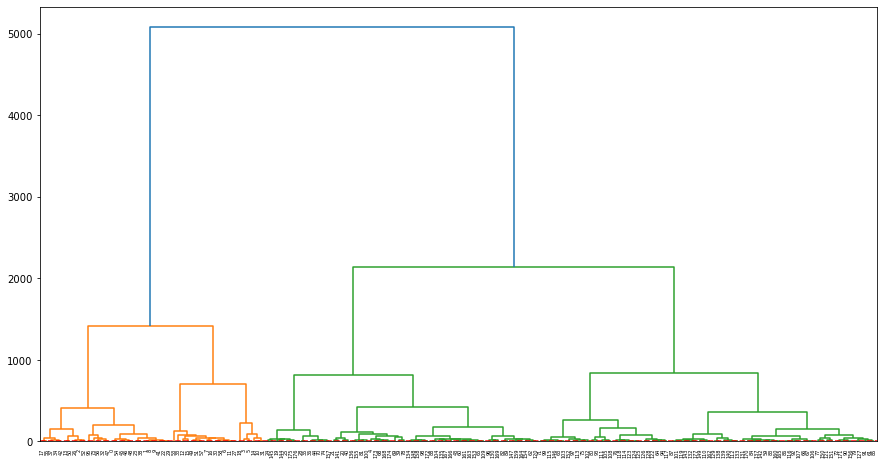

In [25]:
from scipy.cluster.hierarchy import dendrogram ,linkage
import matplotlib.pyplot as plt
link=linkage(df,method="ward")
plt.figure(figsize=(15,8))
dendrogram(link,orientation="top",distance_sort="ascending",show_leaf_counts=True)
plt.hlines(1.0,0,5000,color="r",linestyles="dashed")
plt.show()

In [ ]:
#in this methos the optimum number of cluster is 3

In [ ]:
#model

In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
labels=cluster.fit_predict(df)
labels

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

In [29]:
d1=pd.DataFrame({"Labels":labels,"Alcohol":df["Alcohol"]})
d1

,Labels,Alcohol
0,0,14.23
1,0,13.20
2,0,13.16
3,0,14.37
4,2,13.24
...,...,...
173,2,13.71
174,2,13.40
175,2,13.27
176,2,13.17


insight: clustering in to 3 classes done perfectly.

Conclusions: In both of these clustering methods the optimum number of clusters meets same.